# Imbalanced data

## Instructions
- Load the dataset and explore the variables.
- We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
- Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')
- Build the logistic regression model.
- Evaluate the model.
- Even a simple model will give us more than 70% accuracy. Why?
- Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is there any improvement?


In [2]:
import pandas as pd
import numpy as np

In [3]:
cust_churn = pd.read_csv('files_for_lab/customer_churn.csv')

In [4]:
cust_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
def standardize_columns(df):
    '''
This functions replaces the names of the columns by the lower case version,
blank spaces for underscores '_' and drops the column "Unnamed: 0" with index values
input: data frame
    '''
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

In [25]:
cust_churn = standardize_columns(cust_churn)
cust_churn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data exploration

In [26]:
cust_churn.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [27]:
cust_churn.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [40]:
cust_churn.shape

(7043, 21)

Idea! Transform Churn (yes/no) into (1/0)

In [28]:
cust_churn_copy = cust_churn.copy()
cust_churn_copy['churn'] = cust_churn_copy['churn'].map({'Yes': 1, 'No': 0})

In [29]:
cust_churn_copy.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Numerical variables

In [30]:
cust_churn_num = cust_churn_copy.select_dtypes(include = np.number)

In [31]:
cust_churn_num.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
churn,7043.0,0.265370,0.441561,0.00,0.0,0.00,1.00,1.00


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

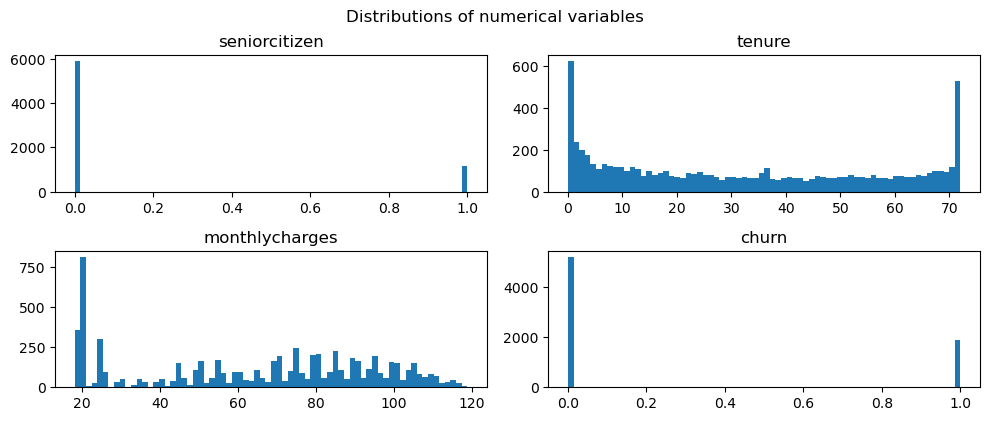

In [33]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=70,ax=ax,figsize=(10,10))
        ax.set_title(var_name)
        ax.grid(False)
    fig.suptitle('Distributions of numerical variables')
    fig.tight_layout()  
    plt.show()

draw_histograms(cust_churn_num, cust_churn_num.columns, 5, 2) 

Based on this:
- Senior citizen is binary and have class imbalance (it's sort of categorical)
- Tenure and Monthly charges are not normally distributed.

For now, I'm leaving it like this and change later just to compare the models.

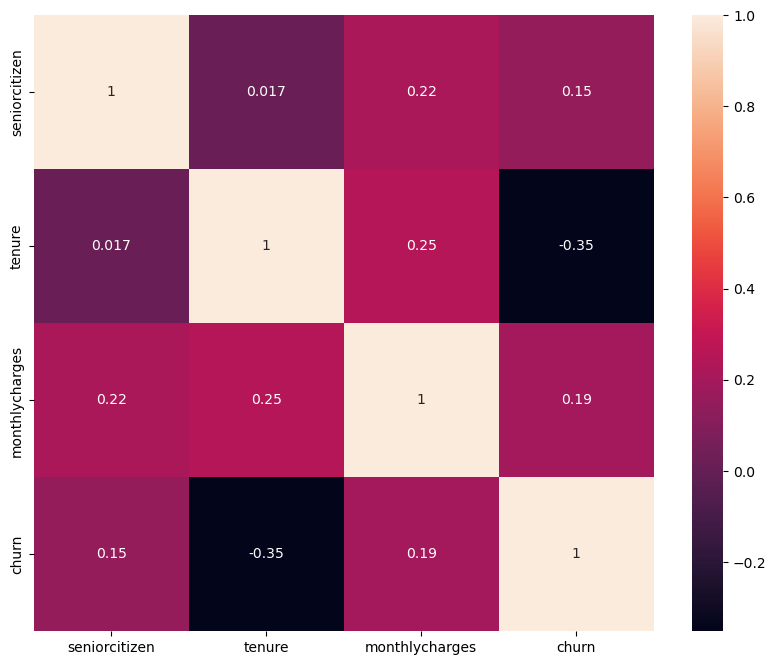

In [34]:
# Multicollinearity
corr_matrix=cust_churn_num.corr() # default: Pearson
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

## Split data: X-y & train-test

In [75]:
# X/y split
X = cust_churn_num.drop('churn',axis = 1)
y = cust_churn_num['churn']

In [76]:
# train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # default test_size value is .2

## Logistic Reg model

### Version 1

In [51]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(random_state=0, solver='lbfgs')
lr1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [52]:
logits1 = np.log(lr1.predict_proba(X_train)[:,1]/(1-lr1.predict_proba(X_train)[:,1]))

In [55]:
coef_table = pd.DataFrame(list(lr1.coef_),columns=X_test.columns) # Coefficients
coef_table

,seniorcitizen,tenure,monthlycharges
0,0.681662,-0.05671,0.031541


#### Explore the model

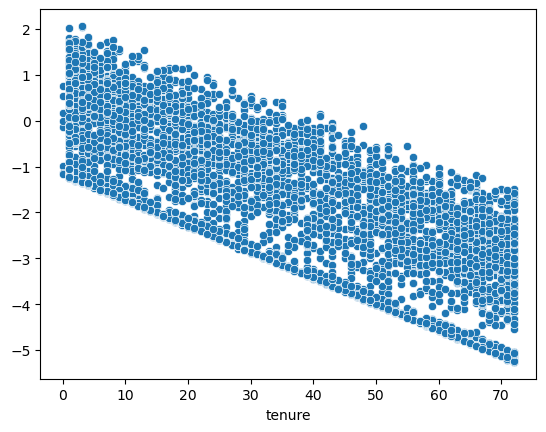

In [53]:
sns.scatterplot(y = logits1,x = X_train['tenure']); 
plt.show()

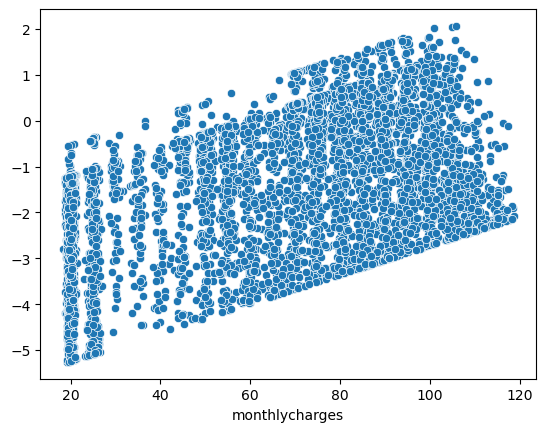

In [54]:
sns.scatterplot(y = logits1,x = X_train['monthlycharges']); 
plt.show()

#### Model1 evaluation

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr1.predict(X_test) # store predictions

print("Accuracy (test set): {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("Precision (test set): {:.2f}".format(precision_score(y_test,y_pred_test)))
print("Recall (test set): {:.2f}".format(recall_score(y_test,y_pred_test)))
print("F1 (test set): {:.2f}".format(f1_score(y_test,y_pred_test)))
print("Kappa (test set): {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

Accuracy (test set): 0.78
Precision (test set): 0.62
Recall (test set): 0.46
F1 (test set): 0.53
Kappa (test set): 0.39


- The accuracy of the model is not bad. This measures how often the prediction by the model was correct. Since the prediction for the majority class (in this case, '0' (no)) is mostly correct, this metric "hides" the bad predictions for the other class.
- However, the recall is low: only 46% it correctly predicted 1 (yes). We want to correctly predict those employees that might leave the company (yes) so we should aim at increasing the recall of the logistic model.

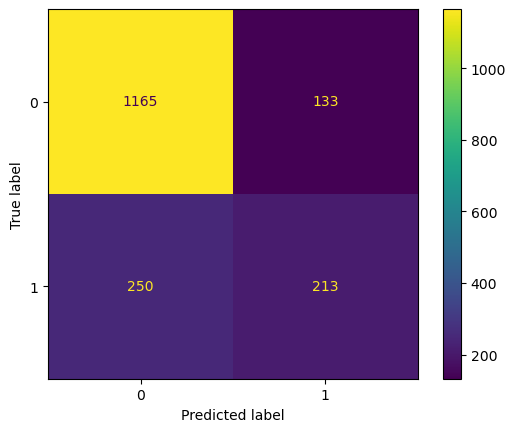

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test) # real and predicted values
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr1.classes_) # labels of the classes
disp.plot()
plt.show()

The prediction for the "yes" is really bad. More than half were wrongly predicted.

## SMOTE oversampling

Class imbalance in the dependent variable (churn)

0    5174
1    1869
Name: churn, dtype: int64


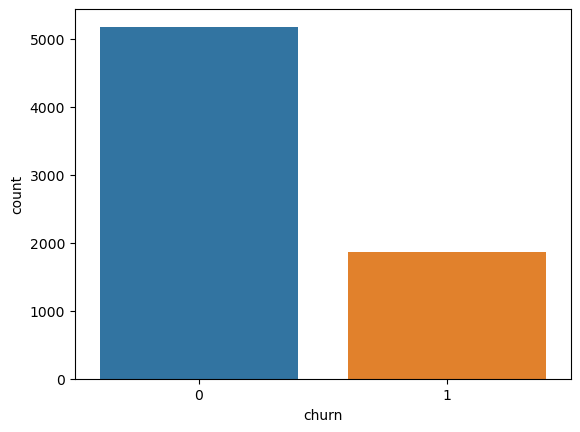

In [58]:
count_classes = cust_churn_num['churn'].value_counts() # pandas series
print(count_classes)
sns.countplot(x = 'churn', data = cust_churn_num);
plt.show()

### Class Imbalance Ratio
Aim: 0

In [60]:
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1]))) # access the pandas series by keys (in this case the keys are 0 and 1)

The class imbalance ratio is: 0.47


In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
sm1 = SMOTE(random_state=100,k_neighbors=3) # how many neighbours of the nearest neighboring data we consider for comparisson

X_train_SMOTE1,y_train_SMOTE1 = sm1.fit_resample(X_train,y_train)

In [64]:
# compare before-after number of samples of the independent variables
print(X_train.shape)
print(X_train_SMOTE1.shape)

(5282, 3)
(7752, 3)


In [66]:
# re-sampled dependent variable
y_train_SMOTE1.value_counts()

0    3876
1    3876
Name: churn, dtype: int64

## Version 2

In [69]:
lr2 = LogisticRegression(random_state=0, solver='lbfgs')
lr2.fit(X_train_SMOTE1, y_train_SMOTE1)
y_pred_test2 = lr2.predict(X_test)

### Model2 evaluation

In [70]:
print("Accuracy (test set): {:.2f}".format(accuracy_score(y_test,y_pred_test2)))
print("Precision (test set): {:.2f}".format(precision_score(y_test,y_pred_test2)))
print("Recall (test set): {:.2f}".format(recall_score(y_test,y_pred_test2)))
print("F1 (test set): {:.2f}".format(f1_score(y_test,y_pred_test2)))
print("Kappa (test set): {:.2f}".format(cohen_kappa_score(y_test,y_pred_test2)))

Accuracy (test set): 0.71
Precision (test set): 0.47
Recall (test set): 0.71
F1 (test set): 0.56
Kappa (test set): 0.36


Accuracy, precision and kappa of the model have decreased. However, the recall has increased (from 0.46 to 0.71). As we can also see in the confusion matrix, now the correvtly predicted '1' has increased (higher recall) but at the expense of the correctly predicted '0'.

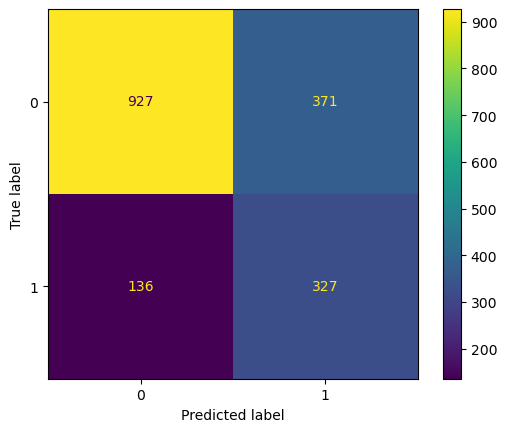

In [71]:
cm_test2 = confusion_matrix(y_test,y_pred_test2) # real and predicted values
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test2, display_labels=lr2.classes_) # labels of the classes
disp.plot()
plt.show()

We can try with a different kneighbotrs value for the SMOTE and see how that changes the model.

## SMOTE 2

In [72]:
sm2 = SMOTE(random_state=100,k_neighbors=5) # how many neighbours of the nearest neighboring data we consider for comparisson

X_train_SMOTE2,y_train_SMOTE2 = sm2.fit_resample(X_train,y_train)

## Version 3

In [73]:
lr3 = LogisticRegression(random_state=0, solver='lbfgs')
lr3.fit(X_train_SMOTE2, y_train_SMOTE2)
y_pred_test3 = lr3.predict(X_test)

### Model3 evaluation

In [74]:
print("Accuracy (test set): {:.2f}".format(accuracy_score(y_test,y_pred_test3)))
print("Precision (test set): {:.2f}".format(precision_score(y_test,y_pred_test3)))
print("Recall (test set): {:.2f}".format(recall_score(y_test,y_pred_test3)))
print("F1 (test set): {:.2f}".format(f1_score(y_test,y_pred_test3)))
print("Kappa (test set): {:.2f}".format(cohen_kappa_score(y_test,y_pred_test3)))

Accuracy (test set): 0.71
Precision (test set): 0.47
Recall (test set): 0.71
F1 (test set): 0.56
Kappa (test set): 0.36


No change from the previous resmapled model - not sure if this is normal.

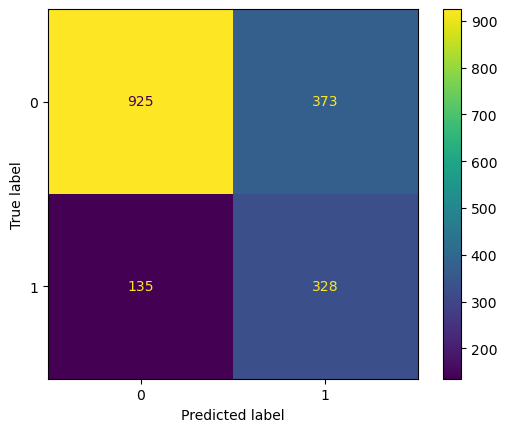

In [83]:
cm_test3 = confusion_matrix(y_test,y_pred_test3) # real and predicted values
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test3, display_labels=lr3.classes_) # labels of the classes
disp.plot()
plt.show()

## Data transformation

In [78]:
from sklearn.preprocessing import StandardScaler

transformer = StandardScaler()
transformer.fit(X_train)

X_train_scaled_np = transformer.transform(X_train) # numpy array
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index) # index = -> to respect the row labels of X_train

# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,seniorcitizen,tenure,monthlycharges
3296,-0.435476,-0.340191,-0.514314
6397,2.296336,0.883210,0.017840
6043,-0.435476,-1.196572,-0.819594
5309,-0.435476,1.168670,-1.483535
3000,-0.435476,-0.829552,0.658427


In [79]:
X_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,5282.0,-5.258846e-16,1.000095,-0.435476,-0.435476,-0.435476,-0.435476,2.296336
tenure,5282.0,-1.107701e-16,1.000095,-1.318912,-0.951892,-0.136291,0.923990,1.617250
monthlycharges,5282.0,-3.584158e-16,1.000095,-1.550263,-0.966395,0.186328,0.836924,1.799472


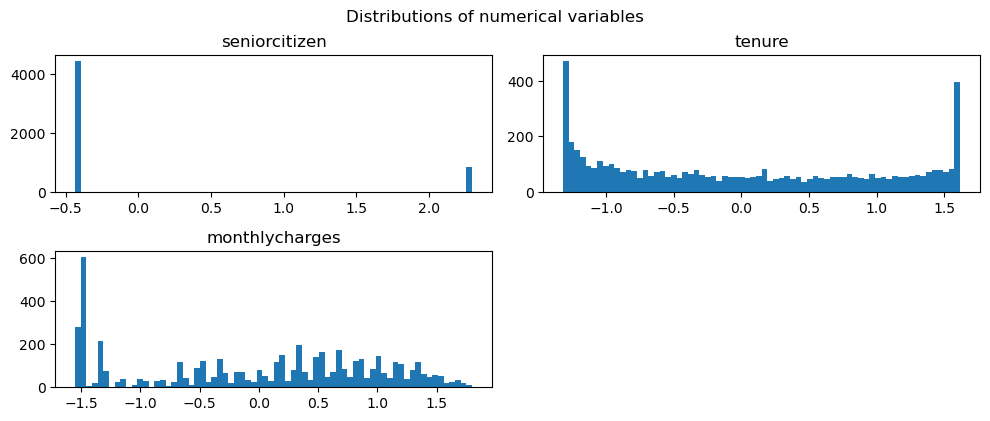

In [82]:
draw_histograms(X_train_scaled, X_train_scaled.columns, 5, 2) 

## Version 4

In [80]:
lr4 = LogisticRegression(random_state=0, solver='lbfgs')
lr4.fit(X_train_scaled, y_train)
y_pred_test4 = lr4.predict(X_test)

### Model4 evaluation

In [81]:
print("Accuracy (test set): {:.2f}".format(accuracy_score(y_test,y_pred_test4)))
print("Precision (test set): {:.2f}".format(precision_score(y_test,y_pred_test4)))
print("Recall (test set): {:.2f}".format(recall_score(y_test,y_pred_test4)))
print("F1 (test set): {:.2f}".format(f1_score(y_test,y_pred_test4)))
print("Kappa (test set): {:.2f}".format(cohen_kappa_score(y_test,y_pred_test4)))

Accuracy (test set): 0.54
Precision (test set): 0.36
Recall (test set): 0.94
F1 (test set): 0.52
Kappa (test set): 0.22


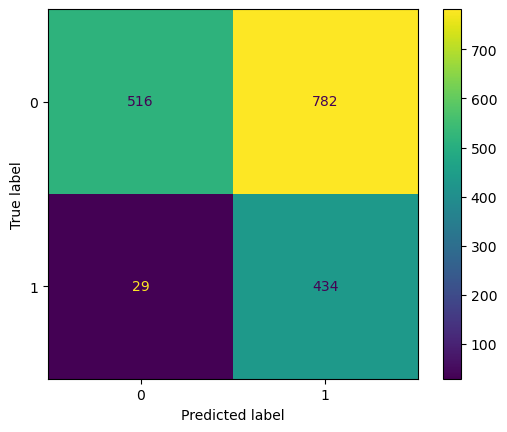

In [84]:
cm_test4 = confusion_matrix(y_test,y_pred_test4) # real and predicted values
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test4, display_labels=lr4.classes_) # labels of the classes
disp.plot()
plt.show()

In this case, the accuracy of the model is lowest of all 4 versions. The '0' (employees that won't leave the company) are quite wrongly predicted (low precision). However, the recall is very high. So, is the focus is to be able to predict those employess that will leave the company, this might be the best model so far.

## Version 5
- Now I'm going to apply the SMOTE oversampling to the scaled data.

In [86]:
sm3 = SMOTE(random_state=100,k_neighbors=3) # how many neighbours of the nearest neighboring data we consider for comparisson

X_train_SMOTE3,y_train_SMOTE3 = sm3.fit_resample(X_train_scaled,y_train)

In [87]:
lr5 = LogisticRegression(random_state=0, solver='lbfgs')
lr5.fit(X_train_SMOTE3, y_train_SMOTE3)
y_pred_test5 = lr5.predict(X_test)

### Model5 evaluation

In [88]:
print("Accuracy (test set): {:.2f}".format(accuracy_score(y_test,y_pred_test5)))
print("Precision (test set): {:.2f}".format(precision_score(y_test,y_pred_test5)))
print("Recall (test set): {:.2f}".format(recall_score(y_test,y_pred_test5)))
print("F1 (test set): {:.2f}".format(f1_score(y_test,y_pred_test5)))
print("Kappa (test set): {:.2f}".format(cohen_kappa_score(y_test,y_pred_test5)))

Accuracy (test set): 0.52
Precision (test set): 0.35
Recall (test set): 0.94
F1 (test set): 0.51
Kappa (test set): 0.21


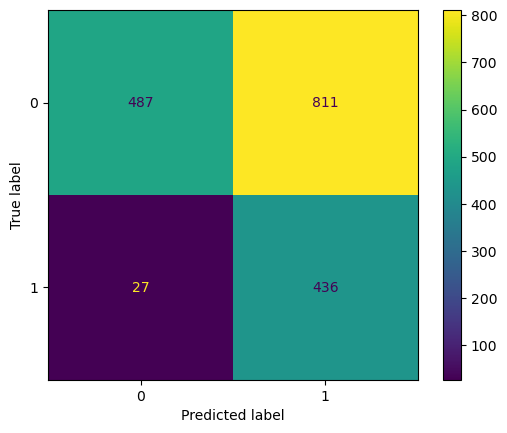

In [89]:
cm_test5 = confusion_matrix(y_test,y_pred_test5) # real and predicted values
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test5, display_labels=lr5.classes_) # labels of the classes
disp.plot()
plt.show()

There is not much improvement in comparison to model4. Accuracy, precision and kappa are slightly lower and recall remained the same.

## Conclusions
- We should choose our model depending on our aim.
- In out case, we want to predict those employees that will/might leave the company ('churn' variables = 1(yes)). The best model, focusing solely on this aim, would be the one with the highest recall -> model 4.